In [2]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Activation, BatchNormalization, Dense, Flatten, Reshape
from tensorflow.keras.layers import LeakyReLU, Conv2D, Conv2DTranspose
from keras.models import Sequential
from keras.optimizers import Adam

In [3]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)

zdim = 100

In [4]:
def build_gen(zdim):
    model = Sequential()
    model.add(Dense(256*7*7, input_dim=zdim))
    model.add(Reshape((7, 7, 256)))

    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'))
    model.add(Activation('tanh'))

    return model

In [5]:
def build_dis(img_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [6]:
def build_gan(gen, dis):
    model = Sequential()
    model.add(gen)
    model.add(dis)
    return model

In [7]:
dis_v = build_dis(img_shape)
dis_v.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

In [8]:
gen_v = build_gen(zdim)
dis_v.trainable = False
gan_v = build_gan(gen_v, dis_v)
gan_v.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [9]:
losses = []
accuracies = []
iteration_checks = []

In [10]:
def train(iterations, batch_size, interval):
    
    original_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

    (Xtrain, _), (_, _) = mnist.load_data()
    Xtrain = Xtrain / 127.5 - 1.0
    Xtrain = np.expand_dims(Xtrain, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        ids = np.random.randint(0, Xtrain.shape[0], batch_size)
        imgs = Xtrain[ids]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = gen_v.predict(z)

        dloss_real = dis_v.train_on_batch(imgs, real)
        dloss_fake = dis_v.train_on_batch(gen_imgs, fake)

        dloss, accuracy = 0.5 * np.add(dloss_real, dloss_fake)

        z = np.random.normal(0, 1, (batch_size, 100))
        gloss = gan_v.train_on_batch(z, real)

        if (iteration+1) % interval == 0:
            losses.append((dloss, gloss))
            accuracies.append(100.0 * accuracy)
            iteration_checks.append(iteration+1)

            sys.stdout = original_stdout
            print("%d [D loss: %f , acc: %.2f] [G loss: %f]" %
                  (iteration+1, dloss, 100.0 * accuracy, gloss))
            sys.stdout = open(os.devnull, 'w')
            show_images(gen_v)


In [11]:
def show_images(gen):
    z = np.random.normal(0, 1, (16, 100))
    gen_imgs = gen.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(4, 4, figsize=(4, 4), sharey=True, sharex=True)

    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

    plt.show()


1000 [D loss: 0.025747 , acc: 100.00] [G loss: 1.079035]


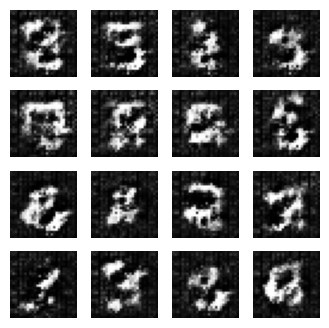

2000 [D loss: 0.002392 , acc: 100.00] [G loss: 0.006094]


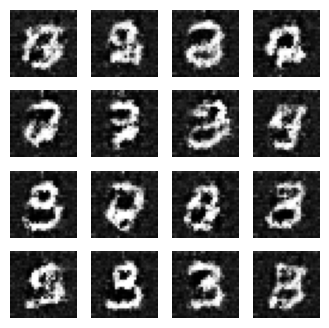

3000 [D loss: 0.000130 , acc: 100.00] [G loss: 0.004700]


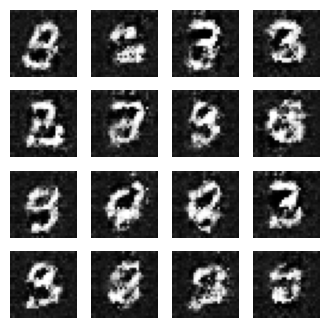

4000 [D loss: 0.000058 , acc: 100.00] [G loss: 0.006589]


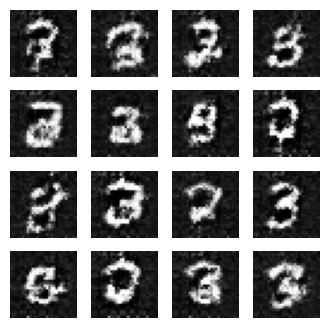

5000 [D loss: 0.000160 , acc: 100.00] [G loss: 0.014758]


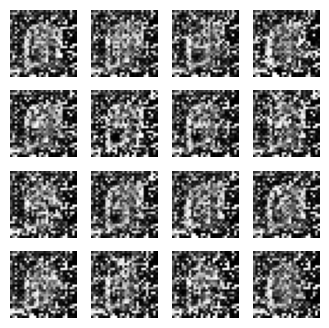

6000 [D loss: 0.000008 , acc: 100.00] [G loss: 0.003757]


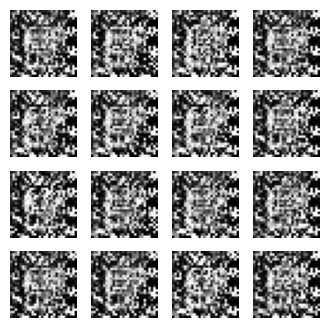

7000 [D loss: 0.000004 , acc: 100.00] [G loss: 0.002043]


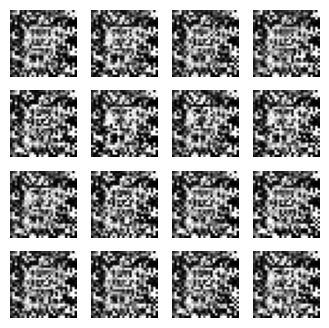

8000 [D loss: 0.000001 , acc: 100.00] [G loss: 0.001485]


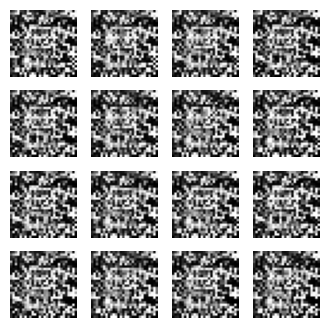

9000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.001097]


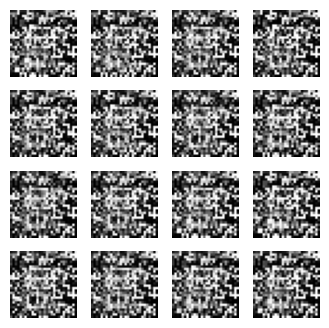

10000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.001396]


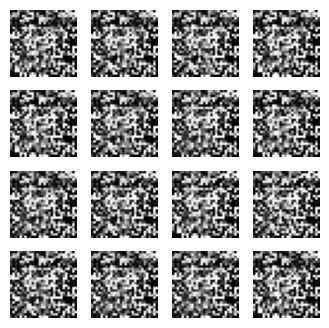

11000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.001612]


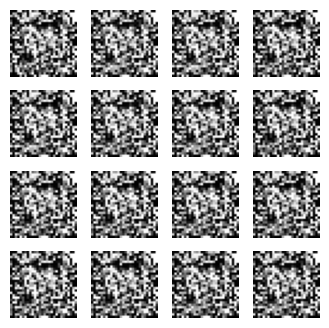

12000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.002086]


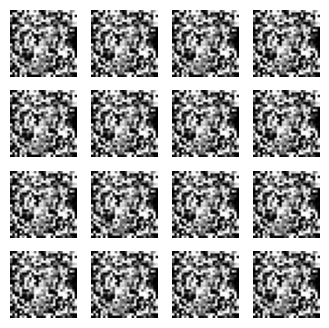

13000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.008130]


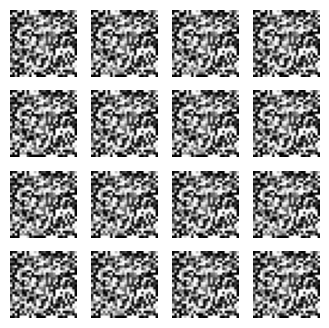

14000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.004352]


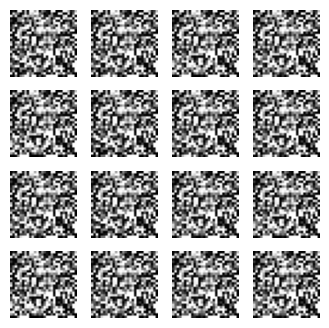

15000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.005305]


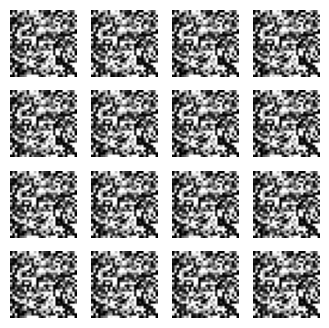

16000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.005658]


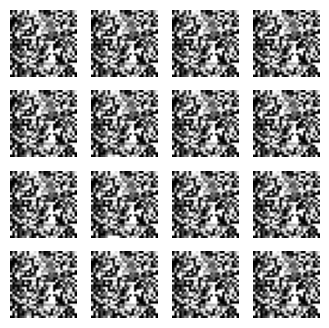

17000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.002989]


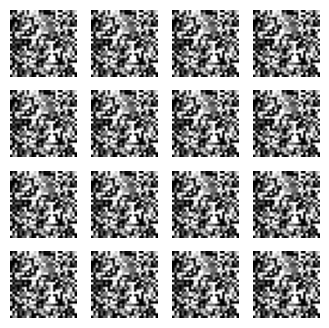

18000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.002303]


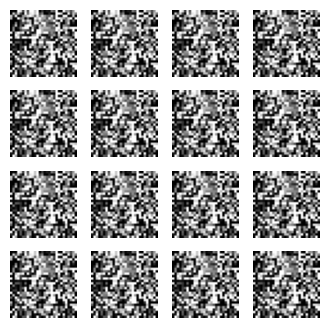

19000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.001792]


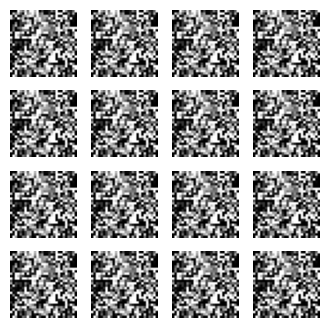

20000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.002897]


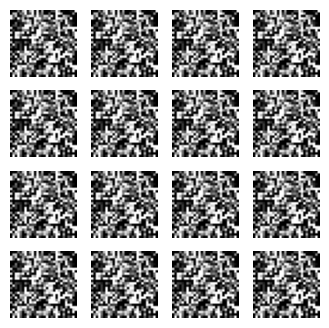

21000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.002426]


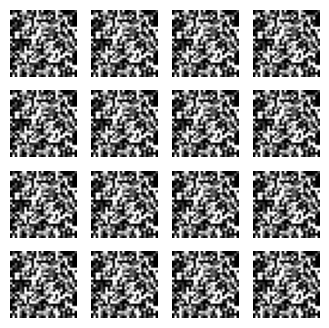

22000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.002902]


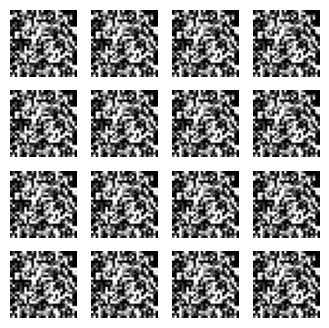

23000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.001885]


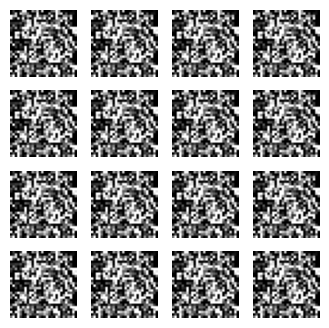

24000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.001618]


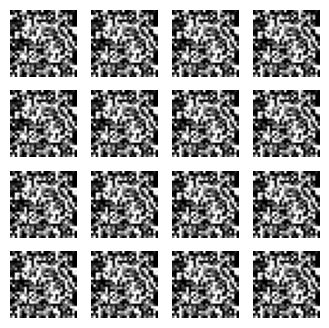

25000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.001649]


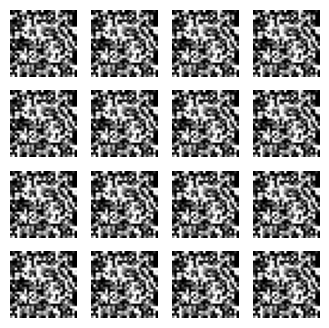

26000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.001137]


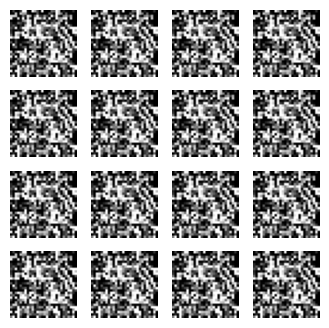

27000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000886]


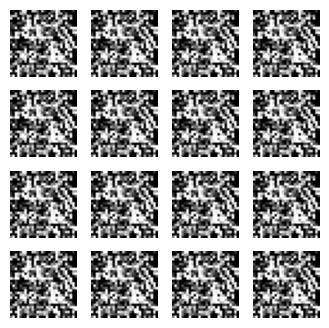

28000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000543]


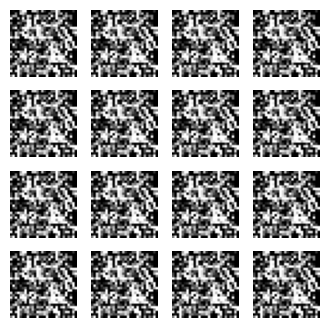

29000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000582]


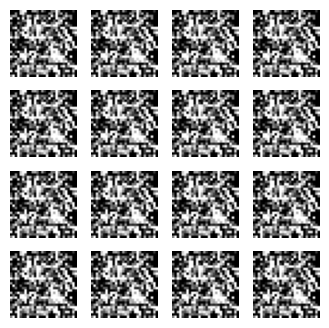

30000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000683]


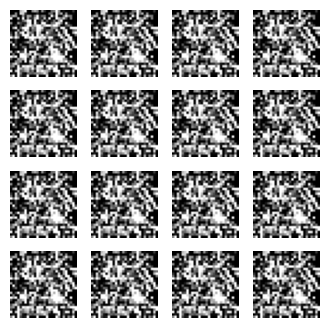

31000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000898]


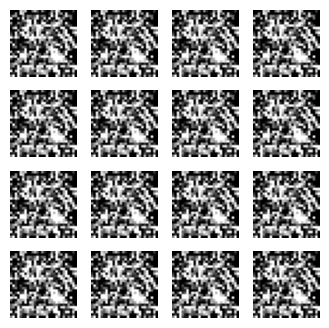

32000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000910]


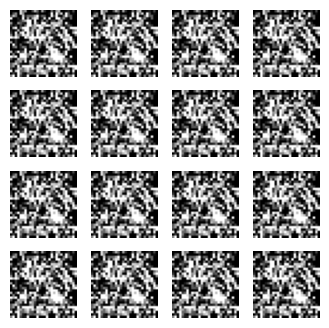

33000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000385]


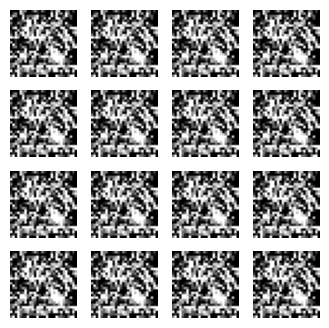

34000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000367]


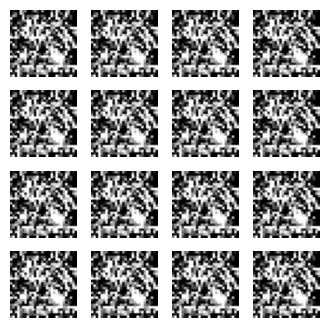

35000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000447]


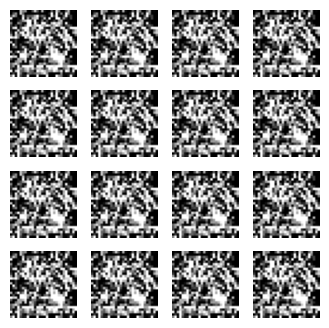

36000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000497]


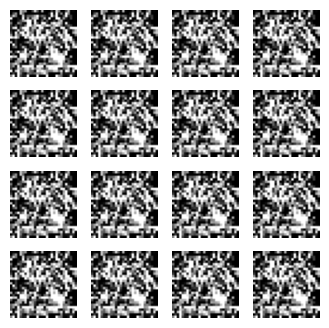

37000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000565]


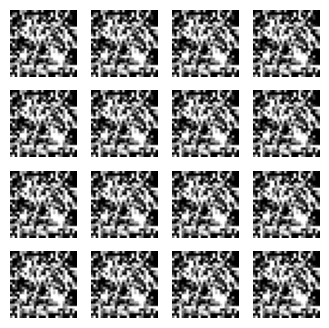

38000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000449]


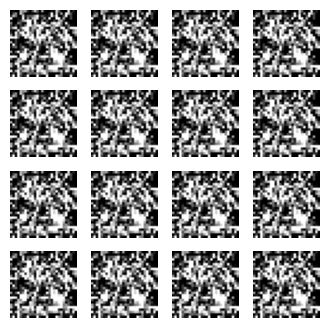

39000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000642]


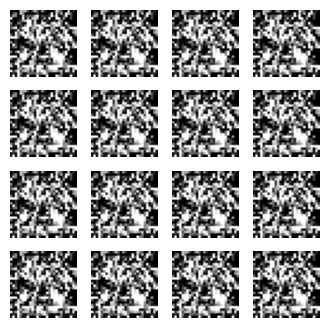

40000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000814]


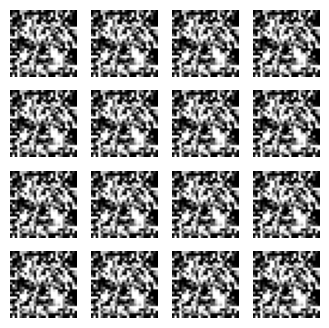

41000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000588]


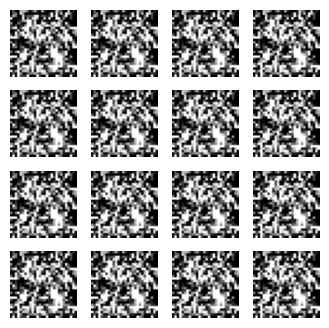

2024-02-12 14:26:29.880652: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


42000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000557]


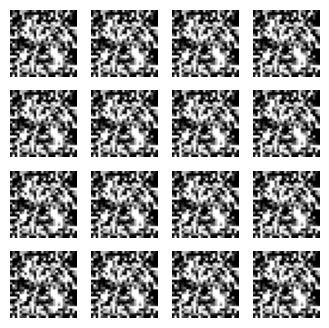

43000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000545]


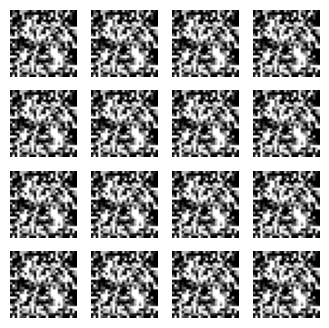

44000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000564]


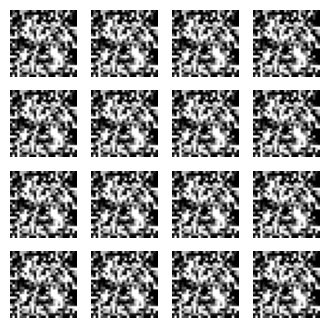

45000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000626]


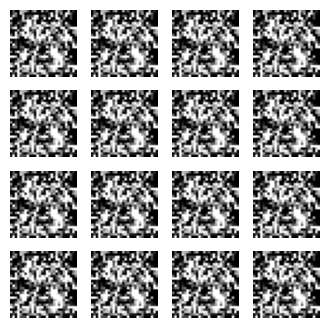

46000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000617]


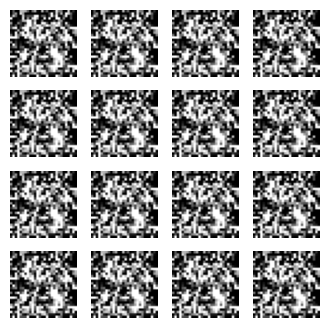

47000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000628]


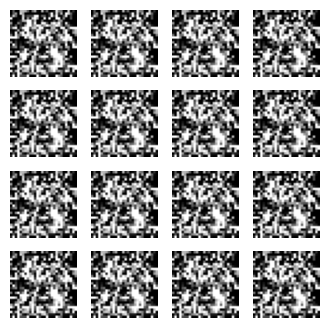

48000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000693]


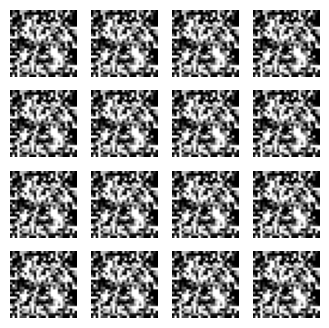

49000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000638]


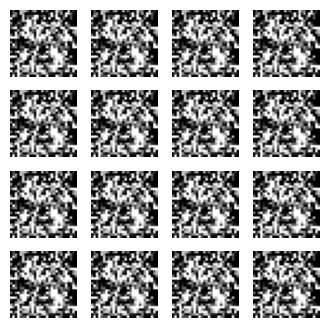

50000 [D loss: 0.000000 , acc: 100.00] [G loss: 0.000444]


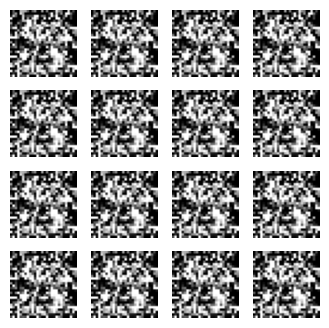

In [12]:
train(50000, 128, 1000)